# Юнит 2

In [1]:
from sklearn import linear_model #линейные модели
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [19]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

## Задание 2.9

In [28]:
data_df = pd.read_csv('../data/task_data.csv')
data_df.info()

X = data_df[['X_1', 'X_2']]
y = data_df['y']

display(X)
display(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SNo     100 non-null    int64  
 1   X_1     100 non-null    float64
 2   X_2     100 non-null    float64
 3   y       100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


,X_1,X_2
0,-0.869144,0.389310
1,-0.993467,-0.610591
2,-0.834064,0.239236
3,-0.136471,0.632003
4,0.403887,0.310784
...,...,...
95,0.531635,-0.479185
96,-0.650192,0.655303
97,0.985299,0.118333
98,-0.275289,0.005730


0     0.0
1     0.0
2     0.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: y, Length: 100, dtype: float64

In [29]:
model_logitr = linear_model.LogisticRegression(random_state=42, solver='sag')
model_logitr.fit(X, y)

LogisticRegression(random_state=42, solver='sag')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


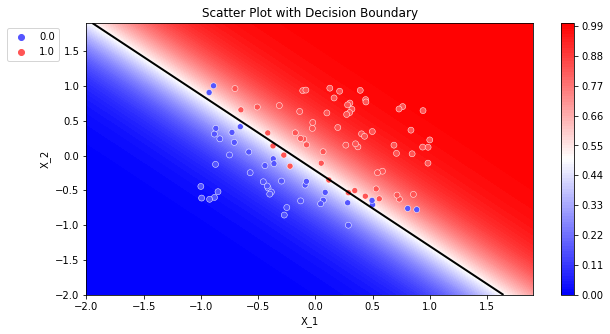

In [30]:
plot_probabilities_2d(X, y, model_logitr)

# Юнит 3

In [ ]:
from sklearn import metrics

# Юнит 4

In [40]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

In [41]:
churn_data = pd.read_csv('../data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 14)

In [43]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [7]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])

In [45]:
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [46]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

In [11]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


## Задание 4.2

In [13]:
model_churn = linear_model.LogisticRegression(solver='sag', random_state=42)
model_churn.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='sag')

In [20]:
y_train_pred = model_churn.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = model_churn.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1271
           1       0.63      0.40      0.49       610

    accuracy                           0.73      1881
   macro avg       0.69      0.64      0.65      1881
weighted avg       0.72      0.73      0.71      1881

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       424
           1       0.63      0.38      0.47       204

    accuracy                           0.72       628
   macro avg       0.69      0.63      0.64       628
weighted avg       0.71      0.72      0.70       628



## Задание 4.3

In [24]:
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)

(1881, 454)


## Задание 4.4

In [26]:
model_churn_poly = linear_model.LogisticRegression(solver='sag', random_state=42, max_iter = 1000)
model_churn_poly.fit(X_train_poly, y_train)

print(metrics.classification_report(y_train, model_churn_poly.predict(X_train_poly)))
print(metrics.classification_report(y_test, model_churn_poly.predict(X_test_poly)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1271
           1       0.78      0.56      0.66       610

    accuracy                           0.81      1881
   macro avg       0.80      0.74      0.76      1881
weighted avg       0.80      0.81      0.80      1881

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       424
           1       0.73      0.56      0.64       204

    accuracy                           0.79       628
   macro avg       0.77      0.73      0.75       628
weighted avg       0.79      0.79      0.78       628



## Задание 4.5

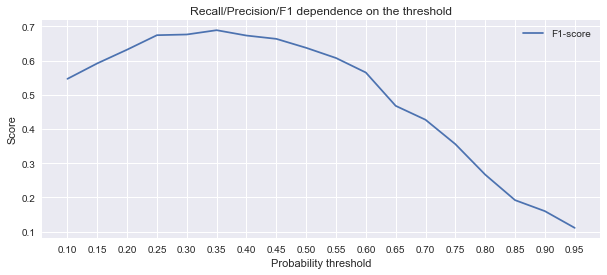

In [30]:
thresholds = np.arange(0.1, 1, 0.05)

y_test_pred_proba = model_churn_poly.predict_proba(X_test_poly)[: , 1]
y_test_pred_proba = pd.Series(y_test_pred_proba)

#recall_scores = []
#precision_scores = []
f1_scores = []

#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_test_pred = y_test_pred_proba.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    #recall_scores.append(metrics.recall_score(y, y_pred))
    #precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
#ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
#ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
#Даём графику название и подписываем оси
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

## Задание 4.6

In [32]:
threshold = 0.35
y_test_pred = y_test_pred_proba.apply(lambda x: 1 if x>threshold else 0)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       424
           1       0.62      0.77      0.69       204

    accuracy                           0.77       628
   macro avg       0.75      0.77      0.76       628
weighted avg       0.79      0.77      0.78       628



# Задание 5.10

In [4]:
from sklearn import tree

In [5]:
diabetes_data = pd.read_csv('../data/diabetes_cleaned.csv')
display(diabetes_data.head())
display(diabetes_data.info())


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               757 non-null    int64  
 1   Glucose                   757 non-null    float64
 2   BloodPressure             757 non-null    float64
 3   SkinThickness             757 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  757 non-null    float64
 6   Age                       757 non-null    int64  
 7   Outcome                   757 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 47.4 KB


None

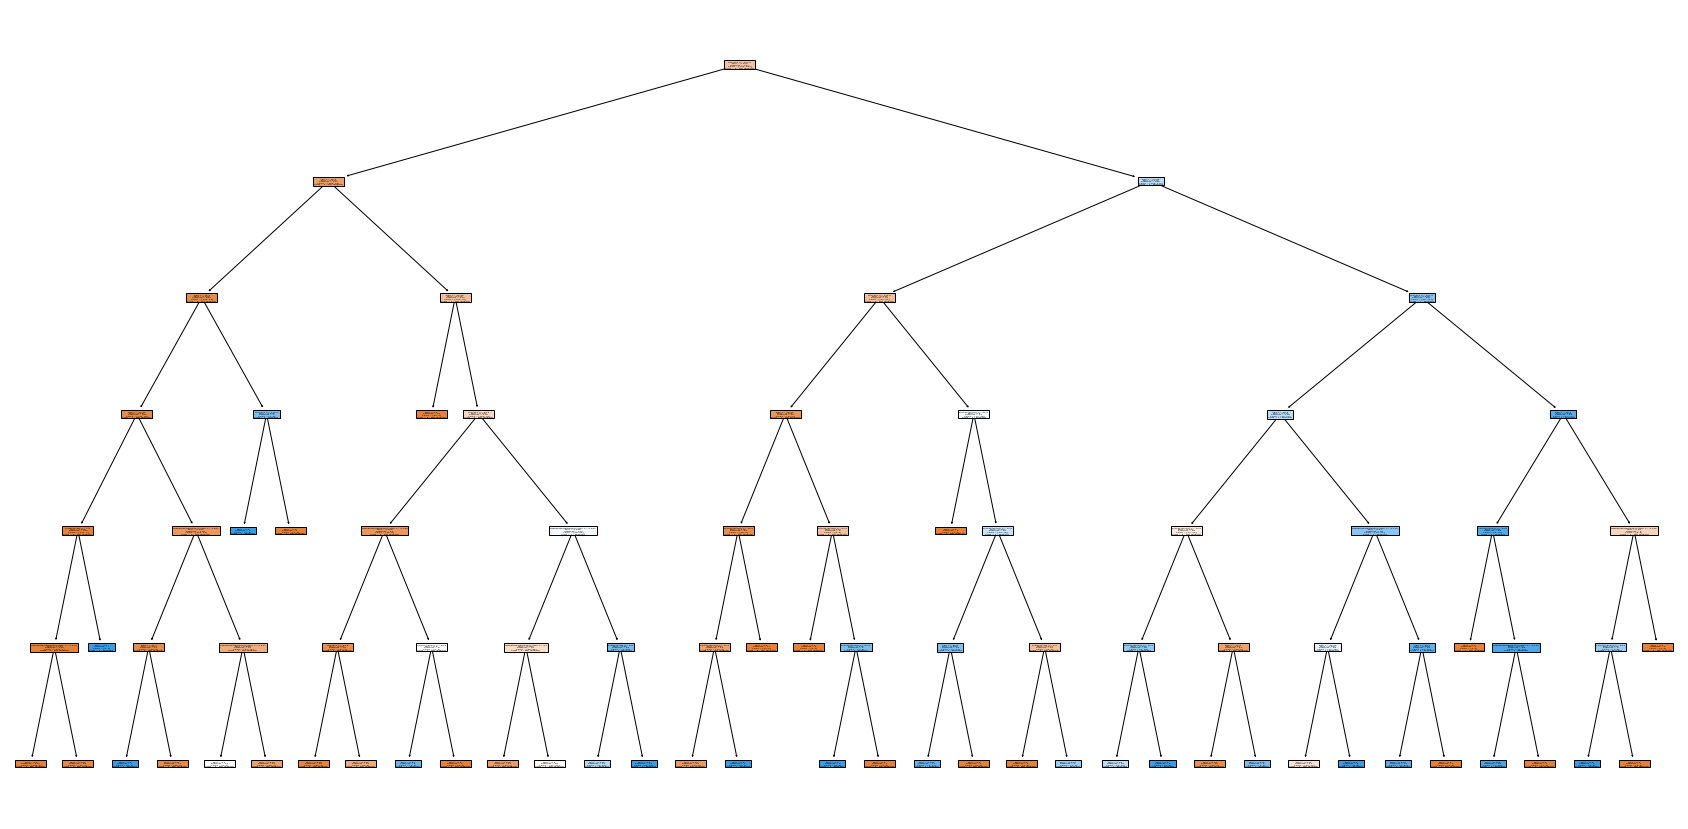

In [13]:
X = diabetes_data.drop(['Outcome'], axis=1)
y = diabetes_data['Outcome']

model_diab_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42)
model_diab_tree.fit(X, y)

fig = plt.figure(figsize=(30, 15))
tree_graph = tree.plot_tree(
    model_diab_tree, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

In [17]:
y_pred = model_diab_tree.predict(X)
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       493
           1       0.85      0.73      0.78       264

    accuracy                           0.86       757
   macro avg       0.85      0.83      0.84       757
weighted avg       0.86      0.86      0.86       757



# Юнит 6

## Задание 6.5

In [23]:
from sklearn import ensemble

In [37]:
wine_data = pd.read_csv('../data/winequality-red.csv', sep=';')
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#Создаём объект класса RandomForestClassifier
model_wine_rf = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    min_samples_leaf=10,
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
model_wine_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_estimators=500,
                       random_state=42)

In [39]:
#Делаем предсказание класса
y_train_pred = model_wine_rf.predict(X_train)
y_test_pred = model_wine_rf.predict(X_test)

#Выводим отчёт о метриках
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       603
           1       0.87      0.84      0.85       676

    accuracy                           0.85      1279
   macro avg       0.85      0.85      0.85      1279
weighted avg       0.85      0.85      0.85      1279

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       141
           1       0.79      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



# Юнит 7

In [49]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


## Задание 7.1

In [51]:
model_churn_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,
    min_samples_leaf=10,
    random_state=42)

model_churn_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       random_state=42)

In [52]:
y_train_pred = model_churn_tree.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = model_churn_tree.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1271
           1       0.80      0.65      0.72       610

    accuracy                           0.83      1881
   macro avg       0.82      0.79      0.80      1881
weighted avg       0.83      0.83      0.83      1881

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       424
           1       0.71      0.58      0.64       204

    accuracy                           0.79       628
   macro avg       0.76      0.73      0.74       628
weighted avg       0.78      0.79      0.78       628



## Задание 7.2

In [57]:
model_churn_rf = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    min_samples_leaf=10,
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
model_churn_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       n_estimators=500, random_state=42)

In [58]:
y_train_pred = model_churn_rf.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = model_churn_rf.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1271
           1       0.86      0.64      0.74       610

    accuracy                           0.85      1881
   macro avg       0.85      0.80      0.82      1881
weighted avg       0.85      0.85      0.84      1881

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       424
           1       0.75      0.58      0.66       204

    accuracy                           0.80       628
   macro avg       0.78      0.74      0.76       628
weighted avg       0.80      0.80      0.79       628



## Задание 7.4

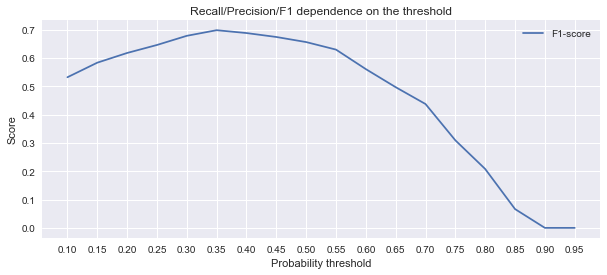

In [60]:
thresholds = np.arange(0.1, 1, 0.05)

y_test_pred_proba = model_churn_rf.predict_proba(X_test)[: , 1]
y_test_pred_proba = pd.Series(y_test_pred_proba)

#recall_scores = []
#precision_scores = []
f1_scores = []

#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_test_pred = y_test_pred_proba.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    #recall_scores.append(metrics.recall_score(y, y_pred))
    #precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
#ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
#ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
#Даём графику название и подписываем оси
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

## Задание 7.5

In [61]:
threshold = 0.35
y_test_pred_opttr = y_test_pred_proba.apply(lambda x: 1 if x> threshold else 0)

print(metrics.f1_score(y_test, y_test_pred_opttr))

0.6975717439293598
